In [2]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [4]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [5]:
tf.keras.backend.clear_session()

In [6]:
subject = 'Pernambuco - Consumo de Cimento (t)'
start_index = 0
split_index = 191 #Referente aos 230 anos de input 
window_size = 36
train_split = split_index + 1 - 30

In [7]:
data = pd.read_csv('2003_mo_model_input_PE.csv')
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
pd.set_option('display.max_columns', None)
data

,Unnamed: 0,IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Pernambuco - value,Pernambuco - Produção de Cimento (t),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - Consumo de Cimento (t)
0,2003-1,0.724032,-5331.049150,11.520143,1.611498,1.036534,1.772069e+08,7.330309e+06,0.969649,0.297418,34.266080,2.096826,1012.239458,1768.569550,25.820814,20.730423,73.547765,2.408009,8.237381e+07,5.574893e+06,8.646979,7.571061e+07,0.688685,8.294029,99.743
1,2003-2,0.690297,-5318.079644,11.189862,1.450389,0.993449,1.773884e+08,7.335910e+06,0.950783,0.298912,34.126272,2.096788,1012.240419,1767.661814,25.820777,20.733369,73.564536,2.408009,8.248102e+07,5.580364e+06,8.650960,7.575437e+07,0.689009,8.288006,86.997
2,2003-3,0.669681,-5436.417870,10.820792,1.870184,0.973020,1.775699e+08,7.341511e+06,0.938332,0.300346,34.414272,2.096740,1012.240980,1767.132301,25.820756,20.735088,73.574319,2.408009,8.258823e+07,5.585835e+06,8.654941,7.579812e+07,0.689334,8.281983,83.033
3,2003-4,0.660494,-5707.015274,10.417840,1.355287,0.940489,1.777514e+08,7.347112e+06,0.926401,0.301729,34.576094,2.096680,1012.241040,1767.075567,25.820754,20.735272,73.575367,2.408009,8.269544e+07,5.591305e+06,8.658922,7.584188e+07,0.689658,8.275960,82.302
4,2003-5,0.648337,-5599.317941,9.959690,1.585538,0.917493,1.779329e+08,7.352713e+06,0.951683,0.302368,34.890197,2.076740,1012.120648,1783.069193,25.939427,20.766986,73.233157,2.418925,8.280265e+07,5.596776e+06,8.662903,7.588563e+07,0.689983,8.269937,80.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2022-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478890,26.779678,2.096826,1012.239458,1768.569550,25.820814,20.730423,73.547765,2.408009,NaN,NaN,NaN,NaN,NaN,NaN,164.137
236,2022-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478683,26.996501,2.096788,1012.240419,1767.661814,25.820777,20.733369,73.564536,2.408009,NaN,NaN,NaN,NaN,NaN,NaN,168.356
237,2022-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476012,26.919241,2.096740,1012.240980,1767.132301,25.820756,20.735088,73.574319,2.408009,NaN,NaN,NaN,NaN,NaN,NaN,172.421
238,2022-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.473486,27.026250,2.096680,1012.241040,1767.075567,25.820754,20.735272,73.575367,2.408009,NaN,NaN,NaN,NaN,NaN,NaN,165.411


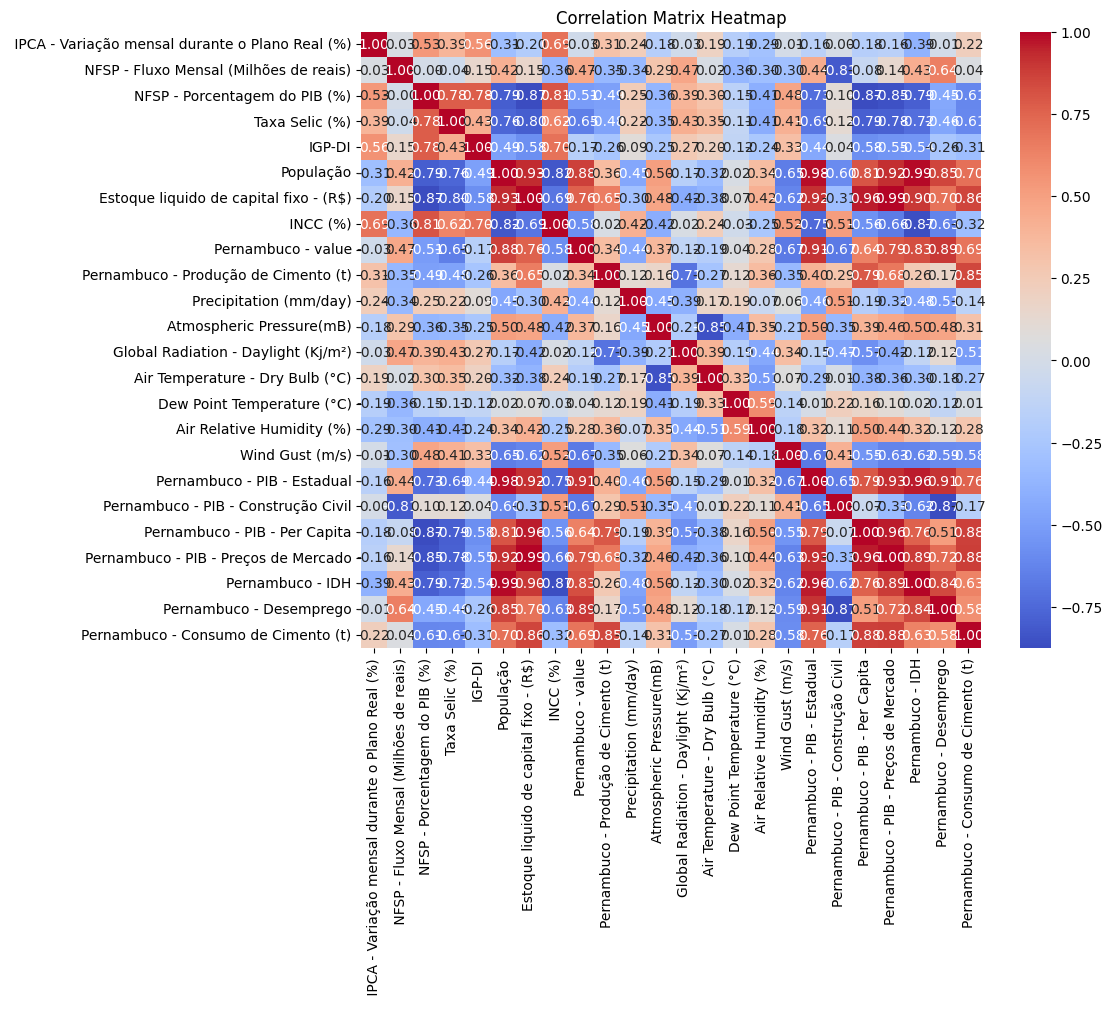

In [8]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [10]:
data =data.drop(['Dew Point Temperature (°C)',
                 ' NFSP - Fluxo Mensal (Milhões de reais)',
                 'Precipitation (mm/day)', 
                 'Wind Gust (m/s)'], axis=1)
data

,Unnamed: 0,IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Pernambuco - value,Pernambuco - Produção de Cimento (t),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Air Relative Humidity (%),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - Consumo de Cimento (t)
0,2003-1,0.724032,11.520143,1.611498,1.036534,1.772069e+08,7.330309e+06,0.969649,0.297418,34.266080,1012.239458,1768.569550,25.820814,73.547765,8.237381e+07,5.574893e+06,8.646979,7.571061e+07,0.688685,8.294029,99.743
1,2003-2,0.690297,11.189862,1.450389,0.993449,1.773884e+08,7.335910e+06,0.950783,0.298912,34.126272,1012.240419,1767.661814,25.820777,73.564536,8.248102e+07,5.580364e+06,8.650960,7.575437e+07,0.689009,8.288006,86.997
2,2003-3,0.669681,10.820792,1.870184,0.973020,1.775699e+08,7.341511e+06,0.938332,0.300346,34.414272,1012.240980,1767.132301,25.820756,73.574319,8.258823e+07,5.585835e+06,8.654941,7.579812e+07,0.689334,8.281983,83.033
3,2003-4,0.660494,10.417840,1.355287,0.940489,1.777514e+08,7.347112e+06,0.926401,0.301729,34.576094,1012.241040,1767.075567,25.820754,73.575367,8.269544e+07,5.591305e+06,8.658922,7.584188e+07,0.689658,8.275960,82.302
4,2003-5,0.648337,9.959690,1.585538,0.917493,1.779329e+08,7.352713e+06,0.951683,0.302368,34.890197,1012.120648,1783.069193,25.939427,73.233157,8.280265e+07,5.596776e+06,8.662903,7.588563e+07,0.689983,8.269937,80.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2022-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478890,26.779678,1012.239458,1768.569550,25.820814,73.547765,NaN,NaN,NaN,NaN,NaN,NaN,164.137
236,2022-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478683,26.996501,1012.240419,1767.661814,25.820777,73.564536,NaN,NaN,NaN,NaN,NaN,NaN,168.356
237,2022-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476012,26.919241,1012.240980,1767.132301,25.820756,73.574319,NaN,NaN,NaN,NaN,NaN,NaN,172.421
238,2022-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.473486,27.026250,1012.241040,1767.075567,25.820754,73.575367,NaN,NaN,NaN,NaN,NaN,NaN,165.411


In [11]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
input_data

,IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Pernambuco - value,Pernambuco - Produção de Cimento (t),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Air Relative Humidity (%),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego
0,2.723741,4.398348,2.132459,3.890153,-2.042341,-2.389042,3.122582,-1.011454,-1.188910,-0.189205,0.484623,-0.180790,-0.532666,-1.754154,-0.181030,-2.511326,-2.321118,-2.100972,-0.864836
1,2.350880,4.222509,1.592202,3.551840,-2.014760,-2.352139,2.970356,-0.964614,-1.195377,-0.188384,0.480777,-0.180834,-0.529009,-1.734705,-0.148206,-2.462275,-2.280399,-2.067858,-0.866889
2,2.123016,4.026019,2.999926,3.391423,-1.987179,-2.315236,2.869895,-0.919667,-1.182056,-0.187906,0.478533,-0.180859,-0.526876,-1.715257,-0.115382,-2.413223,-2.239680,-2.034743,-0.868942
3,2.021477,3.811492,1.273293,3.135979,-1.959598,-2.278333,2.773628,-0.876288,-1.174571,-0.187855,0.478293,-0.180862,-0.526647,-1.695809,-0.082559,-2.364172,-2.198961,-2.001628,-0.870995
4,1.887113,3.567576,2.045407,2.955412,-1.932017,-2.241431,2.977624,-0.856283,-1.160042,-0.290578,0.546059,-0.039709,-0.601265,-1.676361,-0.049735,-2.315120,-2.158242,-1.968514,-0.873048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,-2.010387,-0.572934,-1.311366,0.589021,1.365911,0.389193,-1.749976,1.720800,-1.281757,1.131294,0.968641,-0.780141,0.012437,1.016740,-1.416488,-0.070259,0.355961,1.324101,1.183158
188,-1.870713,-0.588777,-1.417143,1.043728,1.376610,0.370392,-1.593005,1.802101,-1.271596,0.676815,0.912543,-0.239952,-0.330236,1.004554,-1.402870,-0.093306,0.336941,1.314733,1.181904
189,-1.806230,-0.612606,-1.597784,1.387010,1.387308,0.351592,-1.351489,1.813469,-1.268136,0.408500,0.827147,0.231997,-0.503124,0.992368,-1.389252,-0.116354,0.317922,1.305366,1.180650
190,-1.727496,-0.640956,-1.400787,1.815728,1.398006,0.332791,-1.198492,1.843043,-1.270527,0.081432,0.770903,0.576277,-0.401439,0.980182,-1.375634,-0.139402,0.298902,1.295999,1.179397


In [12]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-12)
target_data

0      76.341
1      65.040
2      88.306
3      74.323
4      78.114
        ...  
235       NaN
236       NaN
237       NaN
238       NaN
239       NaN
Name: Pernambuco - Consumo de Cimento (t), Length: 240, dtype: float64

In [13]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Pernambuco - value,Pernambuco - Produção de Cimento (t),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Air Relative Humidity (%),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego
0,2.723741,4.398348,2.132459,3.890153,-2.042341,-2.389042,3.122582,-1.011454,-1.188910,-0.189205,0.484623,-0.180790,-0.532666,-1.754154,-0.181030,-2.511326,-2.321118,-2.100972,-0.864836
1,2.350880,4.222509,1.592202,3.551840,-2.014760,-2.352139,2.970356,-0.964614,-1.195377,-0.188384,0.480777,-0.180834,-0.529009,-1.734705,-0.148206,-2.462275,-2.280399,-2.067858,-0.866889
2,2.123016,4.026019,2.999926,3.391423,-1.987179,-2.315236,2.869895,-0.919667,-1.182056,-0.187906,0.478533,-0.180859,-0.526876,-1.715257,-0.115382,-2.413223,-2.239680,-2.034743,-0.868942
3,2.021477,3.811492,1.273293,3.135979,-1.959598,-2.278333,2.773628,-0.876288,-1.174571,-0.187855,0.478293,-0.180862,-0.526647,-1.695809,-0.082559,-2.364172,-2.198961,-2.001628,-0.870995
4,1.887113,3.567576,2.045407,2.955412,-1.932017,-2.241431,2.977624,-0.856283,-1.160042,-0.290578,0.546059,-0.039709,-0.601265,-1.676361,-0.049735,-2.315120,-2.158242,-1.968514,-0.873048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,-0.214006,-0.607704,0.043807,-1.233012,1.031384,0.819304,-0.883659,0.354413,-0.165538,0.143016,0.651484,0.701967,-0.650679,1.170965,-1.488331,0.445555,0.786479,1.391411,1.357017
158,-0.434717,-0.620523,0.210856,-1.299304,1.042716,0.808136,-0.950771,0.374652,-0.236996,0.485587,0.671960,0.286315,-0.249556,1.172520,-1.494202,0.438851,0.781348,1.390568,1.349817
159,-0.524091,-0.631530,0.107070,-1.248662,1.054049,0.796969,-1.028465,0.400582,-0.309267,0.892967,0.698404,-0.290899,0.175418,1.174075,-1.500073,0.432147,0.776217,1.389726,1.342617
160,-0.614500,-0.640320,0.392942,-1.068274,1.065381,0.785801,-1.103668,0.422300,-0.382346,1.480507,0.722066,-0.819056,0.439865,1.175630,-1.505943,0.425442,0.771086,1.388883,1.335417


In [14]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0       76.341
1       65.040
2       88.306
3       74.323
4       78.114
        ...   
157    143.388
158    188.227
159    143.049
160    148.068
161    133.872
Name: Pernambuco - Consumo de Cimento (t), Length: 162, dtype: float64

In [15]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [16]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(126, 36, 19)

In [17]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),Taxa Selic (%),IGP-DI,População,Estoque liquido de capital fixo - (R$),INCC (%),Pernambuco - value,Pernambuco - Produção de Cimento (t),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Air Relative Humidity (%),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego
126,0.888984,-0.460555,-1.048761,-0.368821,0.651397,0.944085,0.045243,1.276351,1.507092,1.230939,-1.399641,-1.241647,1.092908,0.863757,-0.284837,0.991047,1.042288,0.483520,0.905318
127,0.954254,-0.440372,-0.649312,-0.328087,0.664707,0.947319,0.061828,1.291616,1.497914,0.973438,-1.233731,-1.020530,0.511856,0.879821,-0.344037,0.974598,1.037752,0.491009,0.926343
128,1.045217,-0.419247,-0.535369,-0.176031,0.678017,0.950553,0.046225,1.299215,1.471401,0.636665,-1.058071,-0.630422,-0.064611,0.895884,-0.403236,0.958148,1.033215,0.498499,0.947367
129,1.176395,-0.397019,-1.288807,-0.113037,0.691327,0.953786,0.032522,1.301690,1.429249,0.271162,-0.863531,-0.300755,-0.614579,0.911948,-0.462436,0.941699,1.028678,0.505988,0.968392
130,1.303259,-0.376532,-1.507550,-0.022703,0.704637,0.957020,0.042757,1.304954,1.390164,-0.175787,-0.814263,-0.076417,-1.001928,0.928011,-0.521635,0.925249,1.024142,0.513478,0.989417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,-2.010387,-0.572934,-1.311366,0.589021,1.365911,0.389193,-1.749976,1.720800,-1.281757,1.131294,0.968641,-0.780141,0.012437,1.016740,-1.416488,-0.070259,0.355961,1.324101,1.183158
188,-1.870713,-0.588777,-1.417143,1.043728,1.376610,0.370392,-1.593005,1.802101,-1.271596,0.676815,0.912543,-0.239952,-0.330236,1.004554,-1.402870,-0.093306,0.336941,1.314733,1.181904
189,-1.806230,-0.612606,-1.597784,1.387010,1.387308,0.351592,-1.351489,1.813469,-1.268136,0.408500,0.827147,0.231997,-0.503124,0.992368,-1.389252,-0.116354,0.317922,1.305366,1.180650
190,-1.727496,-0.640956,-1.400787,1.815728,1.398006,0.332791,-1.198492,1.843043,-1.270527,0.081432,0.770903,0.576277,-0.401439,0.980182,-1.375634,-0.139402,0.298902,1.295999,1.179397


In [18]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(30, 36, 19)

In [19]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [20]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    train, train_val = validation_splitter(train_input, 7)
    target,target_val = validation_splitter(train_target, 7)
#     display(train.shape)
#     display(train_val.shape)
#     display(target.shape)
#     display(target_val.shape)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(36, activation='tanh', 
                             return_sequences=True, 
                             input_shape=(reshaped_train.shape[1],
                                          reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.LSTM(180,activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')   
    history = model.fit(train, 
                        target, 
                        epochs=10000,
                        validation_data=(train_val,
                                         target_val),
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [21]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(50)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [23]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[3607102545, 1261192332, 3787758161, 642802102, 892946006, 1266111936, 2479268656, 977910548, 1012299702, 3942467935, 1427444113, 359346434, 4109111719, 64078896, 1053314184, 2731760428, 1736164970, 1318056384, 1565419743, 383386502, 2358447935, 918833427, 257449226, 1247125452, 3680129616, 3342313553, 2316970646, 3473387443, 1169769700, 358254462, 1824094509, 581072371, 38008717, 1643664302, 1702882723, 1135804596, 513891679, 3726308008, 836203935, 1687496514, 1724977799, 1035673283, 1630975547, 2215288723, 343777186, 1938578797, 812164547, 3715555929, 3924798325, 3886483637]


Step: 0 ___________________________________________
val_loss: 259.96990966796875
winner_seed: 3607102545


Step: 1 ___________________________________________
val_loss: 150.1418914794922
winner_seed: 1261192332


Step: 2 ___________________________________________
val_loss: 161.90060424804688


Step: 3 ___________________________________________
val_loss: 111.58878326416016
winner_seed: 642802102


Step: 4 ____

In [24]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)

Epoch 1/10000
4/4 [==============================] - 2s 122ms/step - loss: 29862.9668 - val_loss: 2134.4878
Epoch 2/10000
4/4 [==============================] - 0s 10ms/step - loss: 2194.4431 - val_loss: 2773.6943
Epoch 3/10000
4/4 [==============================] - 0s 9ms/step - loss: 2511.2317 - val_loss: 2489.8928
Epoch 4/10000
4/4 [==============================] - 0s 9ms/step - loss: 3033.0188 - val_loss: 2185.4482
Epoch 5/10000
4/4 [==============================] - 0s 9ms/step - loss: 2003.8470 - val_loss: 2155.1562
Epoch 6/10000
4/4 [==============================] - 0s 9ms/step - loss: 4172.5186 - val_loss: 2038.0569
Epoch 7/10000
4/4 [==============================] - 0s 9ms/step - loss: 2049.3679 - val_loss: 2414.0520
Epoch 8/10000
4/4 [==============================] - 0s 10ms/step - loss: 1903.5541 - val_loss: 1740.4688
Epoch 9/10000
4/4 [==============================] - 0s 10ms/step - loss: 1552.7002 - val_loss: 1344.6453
Epoch 10/10000
4/4 [=============================

4/4 [==============================] - 0s 9ms/step - loss: 243.7962 - val_loss: 302.4667
Epoch 80/10000
4/4 [==============================] - 0s 10ms/step - loss: 266.6404 - val_loss: 382.3751
Epoch 81/10000
4/4 [==============================] - 0s 9ms/step - loss: 313.3901 - val_loss: 312.6588
Epoch 82/10000
4/4 [==============================] - 0s 9ms/step - loss: 242.6445 - val_loss: 281.8021
Epoch 83/10000
4/4 [==============================] - 0s 10ms/step - loss: 268.5506 - val_loss: 278.1918
Epoch 84/10000
4/4 [==============================] - 0s 10ms/step - loss: 231.4394 - val_loss: 263.7025
Epoch 85/10000
4/4 [==============================] - 0s 8ms/step - loss: 358.2743 - val_loss: 601.6337
Epoch 86/10000
4/4 [==============================] - 0s 9ms/step - loss: 410.2606 - val_loss: 343.8524
Epoch 87/10000
4/4 [==============================] - 0s 9ms/step - loss: 268.5191 - val_loss: 281.2159
Epoch 88/10000
4/4 [==============================] - 0s 9ms/step - loss: 25

4/4 [==============================] - 0s 10ms/step - loss: 188.4237 - val_loss: 397.0193
Epoch 158/10000
4/4 [==============================] - 0s 11ms/step - loss: 221.6125 - val_loss: 227.3563
Epoch 159/10000
4/4 [==============================] - 0s 9ms/step - loss: 201.6315 - val_loss: 185.2658
Epoch 160/10000
4/4 [==============================] - 0s 9ms/step - loss: 180.1996 - val_loss: 131.5522
Epoch 161/10000
4/4 [==============================] - 0s 9ms/step - loss: 175.8050 - val_loss: 252.4092
Epoch 162/10000
4/4 [==============================] - 0s 10ms/step - loss: 215.2675 - val_loss: 238.2183
Epoch 163/10000
4/4 [==============================] - 0s 9ms/step - loss: 181.5419 - val_loss: 250.9900
Epoch 164/10000
4/4 [==============================] - 0s 9ms/step - loss: 182.2025 - val_loss: 198.7429
Epoch 165/10000
4/4 [==============================] - 0s 9ms/step - loss: 197.4184 - val_loss: 207.2042
Epoch 166/10000
4/4 [==============================] - 0s 9ms/step -

4/4 [==============================] - 0s 7ms/step - loss: 151.7492 - val_loss: 228.6200
Epoch 236/10000
4/4 [==============================] - 0s 8ms/step - loss: 146.3640 - val_loss: 309.8318
Epoch 237/10000
4/4 [==============================] - 0s 8ms/step - loss: 161.4788 - val_loss: 292.1888
Epoch 238/10000
4/4 [==============================] - 0s 7ms/step - loss: 147.8609 - val_loss: 236.1488
Epoch 239/10000
4/4 [==============================] - 0s 7ms/step - loss: 143.8494 - val_loss: 221.8017
Epoch 240/10000
4/4 [==============================] - 0s 8ms/step - loss: 158.2714 - val_loss: 441.7032
Epoch 241/10000
4/4 [==============================] - 0s 9ms/step - loss: 203.5556 - val_loss: 251.5798
Epoch 242/10000
4/4 [==============================] - 0s 9ms/step - loss: 140.8161 - val_loss: 295.8501
Epoch 243/10000
4/4 [==============================] - 0s 10ms/step - loss: 159.8954 - val_loss: 283.7775
Epoch 244/10000
4/4 [==============================] - 0s 8ms/step - l

4/4 [==============================] - 0s 8ms/step - loss: 126.2567 - val_loss: 227.2066
Epoch 314/10000
4/4 [==============================] - 0s 8ms/step - loss: 98.0889 - val_loss: 231.1552
Epoch 315/10000
4/4 [==============================] - 0s 8ms/step - loss: 135.1577 - val_loss: 242.6130
Epoch 316/10000
4/4 [==============================] - 0s 9ms/step - loss: 118.8531 - val_loss: 261.0865
Epoch 317/10000
4/4 [==============================] - 0s 8ms/step - loss: 123.0264 - val_loss: 243.8143
Epoch 318/10000
4/4 [==============================] - 0s 8ms/step - loss: 123.5863 - val_loss: 250.0616
Epoch 319/10000
4/4 [==============================] - 0s 9ms/step - loss: 99.0556 - val_loss: 265.0314
Epoch 320/10000
4/4 [==============================] - 0s 9ms/step - loss: 128.3869 - val_loss: 221.1366
Epoch 321/10000
4/4 [==============================] - 0s 9ms/step - loss: 121.3636 - val_loss: 233.5646
Epoch 322/10000
4/4 [==============================] - 0s 8ms/step - loss

4/4 [==============================] - 0s 9ms/step - loss: 100.0066 - val_loss: 192.0080
Epoch 392/10000
4/4 [==============================] - 0s 10ms/step - loss: 90.9357 - val_loss: 237.8042
Epoch 393/10000
4/4 [==============================] - 0s 9ms/step - loss: 119.0099 - val_loss: 217.8464
Epoch 394/10000
4/4 [==============================] - 0s 9ms/step - loss: 122.2669 - val_loss: 234.7967
Epoch 395/10000
4/4 [==============================] - 0s 9ms/step - loss: 99.7882 - val_loss: 200.0133
Epoch 396/10000
4/4 [==============================] - 0s 9ms/step - loss: 108.0965 - val_loss: 270.1195
Epoch 397/10000
4/4 [==============================] - 0s 10ms/step - loss: 98.4888 - val_loss: 306.4318
Epoch 398/10000
4/4 [==============================] - 0s 11ms/step - loss: 107.4891 - val_loss: 259.9283
Epoch 399/10000
4/4 [==============================] - 0s 9ms/step - loss: 113.0779 - val_loss: 243.3497
Epoch 400/10000
4/4 [==============================] - 0s 11ms/step - l

4/4 [==============================] - 0s 9ms/step - loss: 109.6338 - val_loss: 355.7666
Epoch 470/10000
4/4 [==============================] - 0s 9ms/step - loss: 92.4001 - val_loss: 296.4485
Epoch 471/10000
4/4 [==============================] - 0s 9ms/step - loss: 86.7444 - val_loss: 329.9792
Epoch 472/10000
4/4 [==============================] - 0s 9ms/step - loss: 85.1388 - val_loss: 317.2357
Epoch 473/10000
4/4 [==============================] - 0s 9ms/step - loss: 97.2526 - val_loss: 306.5700
Epoch 474/10000
4/4 [==============================] - 0s 9ms/step - loss: 90.2168 - val_loss: 316.4631
Epoch 475/10000
4/4 [==============================] - 0s 9ms/step - loss: 85.7970 - val_loss: 250.7231
Epoch 476/10000
4/4 [==============================] - 0s 9ms/step - loss: 101.8012 - val_loss: 322.6599
Epoch 477/10000
4/4 [==============================] - 0s 9ms/step - loss: 92.9078 - val_loss: 274.2238
Epoch 478/10000
4/4 [==============================] - 0s 9ms/step - loss: 98.

4/4 [==============================] - 0s 9ms/step - loss: 103.1211 - val_loss: 230.2258
Epoch 548/10000
4/4 [==============================] - 0s 9ms/step - loss: 74.5912 - val_loss: 191.5009
Epoch 549/10000
4/4 [==============================] - 0s 9ms/step - loss: 91.2787 - val_loss: 181.5723
Epoch 550/10000
4/4 [==============================] - 0s 9ms/step - loss: 85.5984 - val_loss: 213.0332
Epoch 551/10000
4/4 [==============================] - 0s 9ms/step - loss: 85.8549 - val_loss: 188.2113
Epoch 552/10000
4/4 [==============================] - 0s 9ms/step - loss: 79.2122 - val_loss: 208.6647
Epoch 553/10000
4/4 [==============================] - 0s 10ms/step - loss: 77.9991 - val_loss: 239.9412
Epoch 554/10000
4/4 [==============================] - 0s 11ms/step - loss: 74.8885 - val_loss: 277.4479
Epoch 555/10000
4/4 [==============================] - 0s 11ms/step - loss: 75.3069 - val_loss: 288.5900
Epoch 556/10000
4/4 [==============================] - 0s 9ms/step - loss: 7

4/4 [==============================] - 0s 9ms/step - loss: 80.6516 - val_loss: 287.5723
Epoch 626/10000
4/4 [==============================] - 0s 8ms/step - loss: 89.8586 - val_loss: 242.3947
Epoch 627/10000
4/4 [==============================] - 0s 9ms/step - loss: 91.0134 - val_loss: 235.3157
Epoch 628/10000
4/4 [==============================] - 0s 8ms/step - loss: 83.9264 - val_loss: 210.0506
Epoch 629/10000
4/4 [==============================] - 0s 8ms/step - loss: 100.7931 - val_loss: 371.2757
Epoch 630/10000
4/4 [==============================] - 0s 8ms/step - loss: 117.4043 - val_loss: 317.3621
Epoch 631/10000
4/4 [==============================] - 0s 9ms/step - loss: 94.0658 - val_loss: 399.5703
Epoch 632/10000
4/4 [==============================] - 0s 10ms/step - loss: 83.9684 - val_loss: 278.2914
Epoch 633/10000
4/4 [==============================] - 0s 9ms/step - loss: 79.1712 - val_loss: 240.8776
Epoch 634/10000
4/4 [==============================] - 0s 9ms/step - loss: 94

Epoch 704/10000
4/4 [==============================] - 0s 9ms/step - loss: 80.1588 - val_loss: 315.6139
Epoch 705/10000
4/4 [==============================] - 0s 9ms/step - loss: 68.5361 - val_loss: 287.9373
Epoch 706/10000
4/4 [==============================] - 0s 9ms/step - loss: 82.7681 - val_loss: 296.7704
Epoch 707/10000
4/4 [==============================] - 0s 9ms/step - loss: 103.2921 - val_loss: 358.9402
Epoch 708/10000
4/4 [==============================] - 0s 9ms/step - loss: 111.0041 - val_loss: 266.4956
Epoch 709/10000
4/4 [==============================] - 0s 9ms/step - loss: 69.3621 - val_loss: 252.1776
Epoch 710/10000
4/4 [==============================] - 0s 9ms/step - loss: 82.3572 - val_loss: 299.4251
Epoch 711/10000
4/4 [==============================] - 0s 9ms/step - loss: 78.8199 - val_loss: 384.4669
Epoch 712/10000
4/4 [==============================] - 0s 9ms/step - loss: 92.9480 - val_loss: 150.3338
Epoch 713/10000
4/4 [==============================] - 0s 9ms/

4/4 [==============================] - 0s 8ms/step - loss: 83.5535 - val_loss: 286.4366
Epoch 783/10000
4/4 [==============================] - 0s 8ms/step - loss: 72.3310 - val_loss: 273.3027
Epoch 784/10000
4/4 [==============================] - 0s 8ms/step - loss: 90.5899 - val_loss: 293.7091
Epoch 785/10000
4/4 [==============================] - 0s 8ms/step - loss: 82.6834 - val_loss: 348.4252
Epoch 786/10000
4/4 [==============================] - 0s 9ms/step - loss: 87.1082 - val_loss: 256.8312
Epoch 787/10000
4/4 [==============================] - 0s 9ms/step - loss: 76.3496 - val_loss: 266.3684
Epoch 788/10000
4/4 [==============================] - 0s 9ms/step - loss: 77.7573 - val_loss: 262.8789
Epoch 789/10000
4/4 [==============================] - 0s 9ms/step - loss: 79.5500 - val_loss: 270.9197
Epoch 790/10000
4/4 [==============================] - 0s 10ms/step - loss: 69.2630 - val_loss: 305.9833
Epoch 791/10000
4/4 [==============================] - 0s 8ms/step - loss: 70.7

Epoch 861/10000
4/4 [==============================] - 0s 9ms/step - loss: 92.9709 - val_loss: 268.0646
Epoch 862/10000
4/4 [==============================] - 0s 8ms/step - loss: 77.6871 - val_loss: 228.6460
Epoch 863/10000
4/4 [==============================] - 0s 8ms/step - loss: 65.8579 - val_loss: 226.4416
Epoch 864/10000
4/4 [==============================] - 0s 8ms/step - loss: 76.9843 - val_loss: 220.8742
Epoch 865/10000
4/4 [==============================] - 0s 8ms/step - loss: 67.9979 - val_loss: 248.2419
Epoch 866/10000
4/4 [==============================] - 0s 8ms/step - loss: 82.7114 - val_loss: 246.3239
Epoch 867/10000
4/4 [==============================] - 0s 8ms/step - loss: 77.3207 - val_loss: 275.4049
Epoch 868/10000
4/4 [==============================] - 0s 8ms/step - loss: 71.3899 - val_loss: 258.2194
Epoch 869/10000
4/4 [==============================] - 0s 8ms/step - loss: 76.4050 - val_loss: 246.0615
Epoch 870/10000
4/4 [==============================] - 0s 9ms/st

Epoch 940/10000
4/4 [==============================] - 0s 8ms/step - loss: 51.3914 - val_loss: 254.6957
Epoch 941/10000
4/4 [==============================] - 0s 8ms/step - loss: 59.7855 - val_loss: 244.8321
Epoch 942/10000
4/4 [==============================] - 0s 8ms/step - loss: 57.2852 - val_loss: 318.1705
Epoch 943/10000
4/4 [==============================] - 0s 8ms/step - loss: 66.6024 - val_loss: 279.6009
Epoch 944/10000
4/4 [==============================] - 0s 8ms/step - loss: 72.4720 - val_loss: 216.3864
Epoch 945/10000
4/4 [==============================] - 0s 8ms/step - loss: 55.4892 - val_loss: 220.6837
Epoch 946/10000
4/4 [==============================] - 0s 8ms/step - loss: 64.3436 - val_loss: 272.7687
Epoch 947/10000
4/4 [==============================] - 0s 8ms/step - loss: 62.2966 - val_loss: 275.0499
Epoch 948/10000
4/4 [==============================] - 0s 8ms/step - loss: 74.8487 - val_loss: 209.7651
Epoch 949/10000
4/4 [==============================] - 0s 9ms/st

4/4 [==============================] - 0s 8ms/step - loss: 68.1253 - val_loss: 305.4832
Epoch 1019/10000
4/4 [==============================] - 0s 8ms/step - loss: 72.4603 - val_loss: 332.6115
Epoch 1020/10000
4/4 [==============================] - 0s 8ms/step - loss: 82.2828 - val_loss: 252.1556
Epoch 1021/10000
4/4 [==============================] - 0s 8ms/step - loss: 54.7406 - val_loss: 253.1983
Epoch 1022/10000
4/4 [==============================] - 0s 8ms/step - loss: 64.8167 - val_loss: 249.7415
Epoch 1023/10000
4/4 [==============================] - 0s 8ms/step - loss: 55.0036 - val_loss: 274.6732
Epoch 1024/10000
4/4 [==============================] - 0s 9ms/step - loss: 64.9491 - val_loss: 284.3397
Epoch 1025/10000
4/4 [==============================] - 0s 8ms/step - loss: 69.3917 - val_loss: 269.0150
Epoch 1026/10000
4/4 [==============================] - 0s 8ms/step - loss: 56.1074 - val_loss: 291.2198
Epoch 1027/10000
4/4 [==============================] - 0s 8ms/step - lo

In [25]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [26]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 14ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12,Month-13,Month-14,Month-15,Month-16,Month-17,Month-18,Month-19,Month-20,Month-21,Month-22,Month-23,Month-24,Month-25,Month-26,Month-27,Month-28,Month-29,Month-30
Prediction,140.320557,139.588409,139.838242,146.439484,152.426743,149.494293,145.434494,144.533035,143.130768,136.872803,131.027481,130.198639,129.847183,129.800171,128.654602,128.029907,127.474892,126.863174,127.26123,126.932022,126.529648,126.421997,126.580093,126.461861,126.131561,125.654106,125.609451,125.248688,125.102371,124.692795
Target,131.464,151.37,154.276,153.331,152.6,136.567,144.855,126.352,138.148,129.978,109.083,147.44,132.5,158.533,133.813,155.827,146.197,122.278,149.983,123.483,125.104,129.633,138.233,109.657,128.809,140.408,134.634,189.04,166.406,155.456
Error,8.856552,11.781586,14.437759,6.89151,0.173264,12.927292,0.579498,18.181038,4.982773,6.894806,21.944481,17.241364,2.652817,28.732834,5.158401,27.797089,18.722115,4.585175,22.721771,3.44902,1.425652,3.210999,11.652908,16.804863,2.677444,14.753899,9.024551,63.791306,41.303635,30.763199


In [27]:
display(mae)
display(mape)

14.4706545

0.0982661

In [28]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input.iloc[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [29]:
errors, mae, mape = year_mae_mape_calculator(trained_model, 
                                             test_input, 
                                             test_target, 
                                             start_index)
display(errors)
display(mae)
display(mape)

NameError: name 'test_target' is not defined